<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [46]:
import pandas as pd
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np


Load the dataset into a dataframe.


In [122]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


<AxesSubplot:ylabel='Density'>

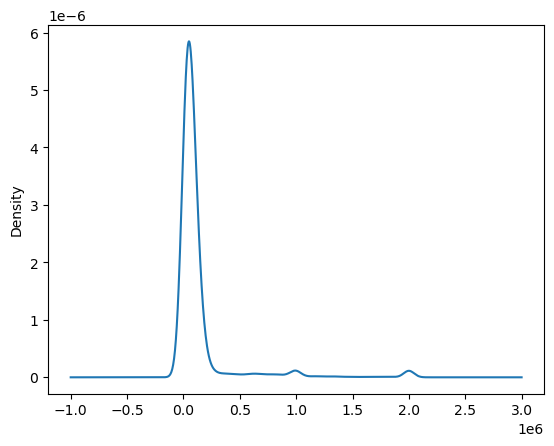

In [132]:
df['ConvertedComp'].plot(kind='kde')

Plot the histogram for the column `ConvertedComp`.


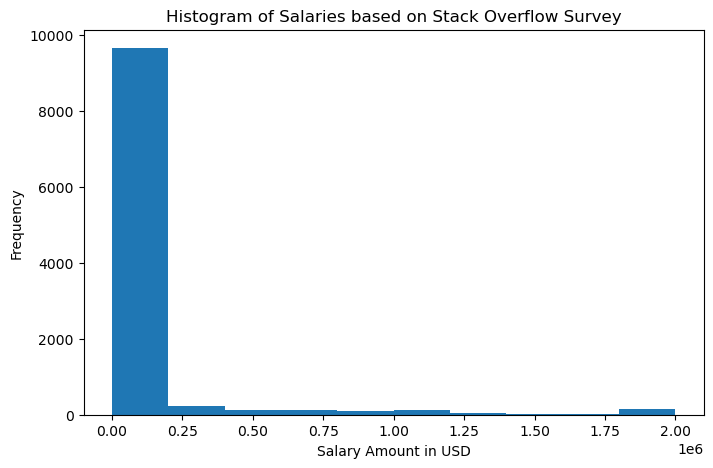

In [123]:
#count, bin_edges = np.histogram(df['ConvertedComp'])

df["ConvertedComp"].plot(kind='hist', figsize=(8, 5)) #ticks=bin_edges)

# add a title to the histogram
plt.title('Histogram of Salaries based on Stack Overflow Survey')
# add y-label
plt.ylabel('Frequency')
# add x-label
plt.xlabel('Salary Amount in USD')

plt.show()


What is the median of the column `ConvertedComp`?


In [99]:
# your code goes here
df["ConvertedComp"].median()

57745.0

How many responders identified themselves only as a **Man**?


In [100]:
# your code goes here
df["Gender"].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [101]:
df2=(df.query("Gender=='Woman'")["ConvertedComp"])
print(df2.shape)
print(df2.median())



(731,)
57708.0


Give the five number summary for the column `Age`?
df["Age"].describe

**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [111]:
#print(df["Age"].describe())

min_value = 16
Q1 = 25
median = df["Age"].median()
Q3 = 35
max_value = 99

print("The five number summary:")
print("Min: ", min_value) 
print("Q1: ", Q1)
print("Median: ", median)
print("Q3: ", Q3)
print("Max: ", max_value)


The five number summary:
Min:  16
Q1:  25
Median:  29.0
Q3:  35
Max:  99


Plot a histogram of the column `Age`.


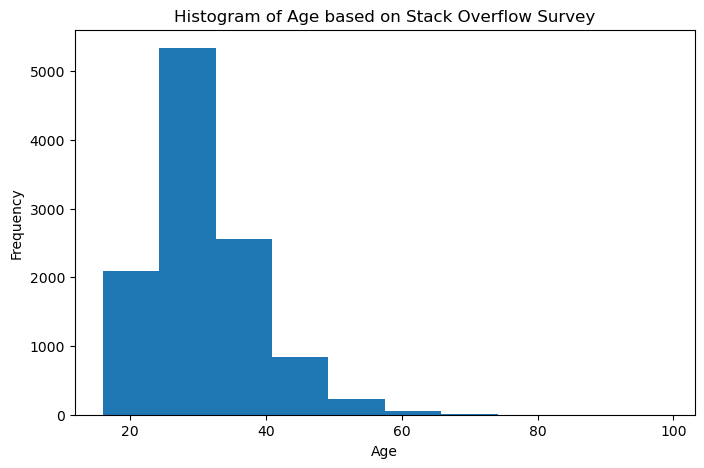

In [103]:
# your code goes here
df["Age"].plot(kind='hist', figsize=(8, 5)) #xticks=bin_edges)

# add a title to the histogram
plt.title('Histogram of Age based on Stack Overflow Survey')
# add y-label
plt.ylabel('Frequency')
# add x-label
plt.xlabel('Age')

plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


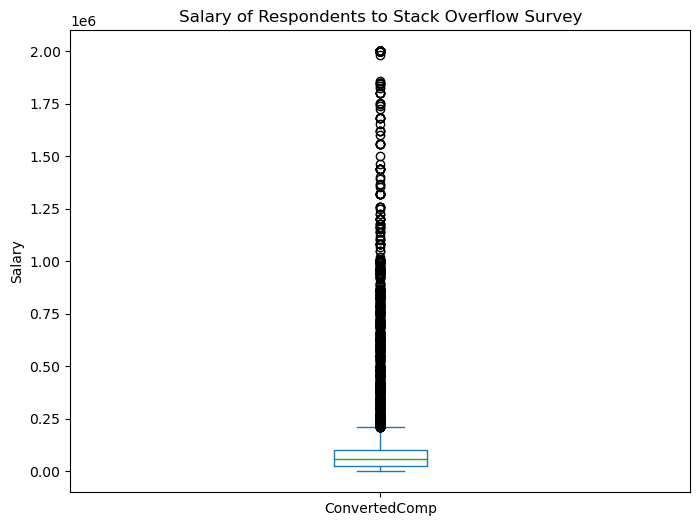

In [56]:
df["ConvertedComp"].plot(kind='box', figsize=(8, 6))

plt.title('Salary of Respondents to Stack Overflow Survey')
plt.ylabel('Salary')

plt.show()


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [112]:
# your code goes here
#print(df["ConvertedComp"].describe())
IQR=100000-26868
print("The Inter Quartile Range is: ", IQR)

The Inter Quartile Range is:  73132


Find out the upper and lower bounds.


In [65]:
#Lower bounds = Q1 – 1.5 * (Q3-Q1)
lower_bounds = 26868 - 1.5 * 73132
print("The lower bounds are: ", lower_bounds)
#Upper bounds = Q3 + 1.5 * (Q3-Q1)
upper_bounds = 100000 + 1.5 * 73132
print("The upper bounds are: ", upper_bounds)




The lower bounds are:  -82830.0
The upper bounds are:  209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [113]:
df_outliers = df.loc[df["ConvertedComp"] >= upper_bounds]
print(df_outliers.shape)
print("There are 879 outliers.")


(879, 85)
There are 879 outliers.


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


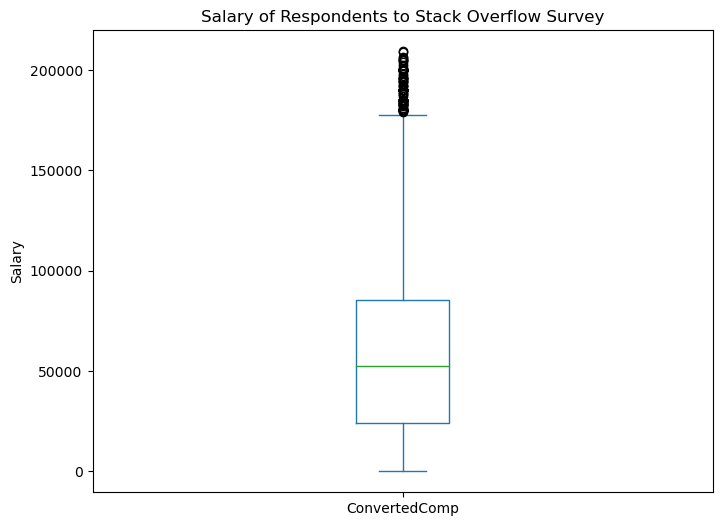

In [116]:
# your code goes here
df.drop(df[df['ConvertedComp'] >= upper_bounds].index, inplace = True)

df["ConvertedComp"].describe()

#new boxplot after previous outliers removed
df["ConvertedComp"].plot(kind='box', figsize=(8, 6))
plt.title('Salary of Respondents to Stack Overflow Survey')
plt.ylabel('Salary')
plt.show()

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [130]:
# your code goes here
df3 = df.corr()
print(df3["Age"])

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
